# 2. Get data
### 2.1 Read and explore data

In [1]:
import os 
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("data")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
def fetch_data(url=HOUSING_URL, path=HOUSING_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    tgz_path = os.path.join(path,"housing.tgz")
    urllib.request.urlretrieve(url, tgz_path)
    data = tarfile.open(tgz_path)
    data.extractall(path=path)
    data.close()

def load_data(path=HOUSING_PATH):
    csv_path = os.path.join(path,'housing.csv')
    return pd.read_csv(csv_path)

In [4]:
os.path.isdir(HOUSING_PATH)

True

In [5]:
try:
    if not os.path.isdir(HOUSING_PATH):
        os.makedirs(HOUSING_PATH)
        fetch_data()
except:
  print('An exception occurred')

housing_data = load_data(path=HOUSING_PATH)

In [6]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- This data exploration summary focuses on a dataset comprising 20,640 instances, a size considered relatively small by machine learning standards but ideal for introductory analysis.
- The `total_bedrooms` attribute has 20,433 non-null values, indicating some missing data
- The dataset predominantly consists of numerical data types for efficient computation and analysis, except for the `ocean_proximity field`, which is a categrorical data

Next, A deeper dive into the numerical attributes through the `describe()` method uncovers insightful statistics about the housing market across different districts. Notably, the distribution of housing_median_age across districts reveals significant variability: 25% of the districts exhibit a housing median age of less than 18 years, suggesting a considerable amount of relatively new housing developments. The median housing age stands at less than 29 years, indicating that over half of the districts have housing developments that are relatively recent but not brand-new. Furthermore, 75% of districts have a housing median age of less than 37 years, highlighting that a majority of the housing stock is under four decades old.

In [8]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

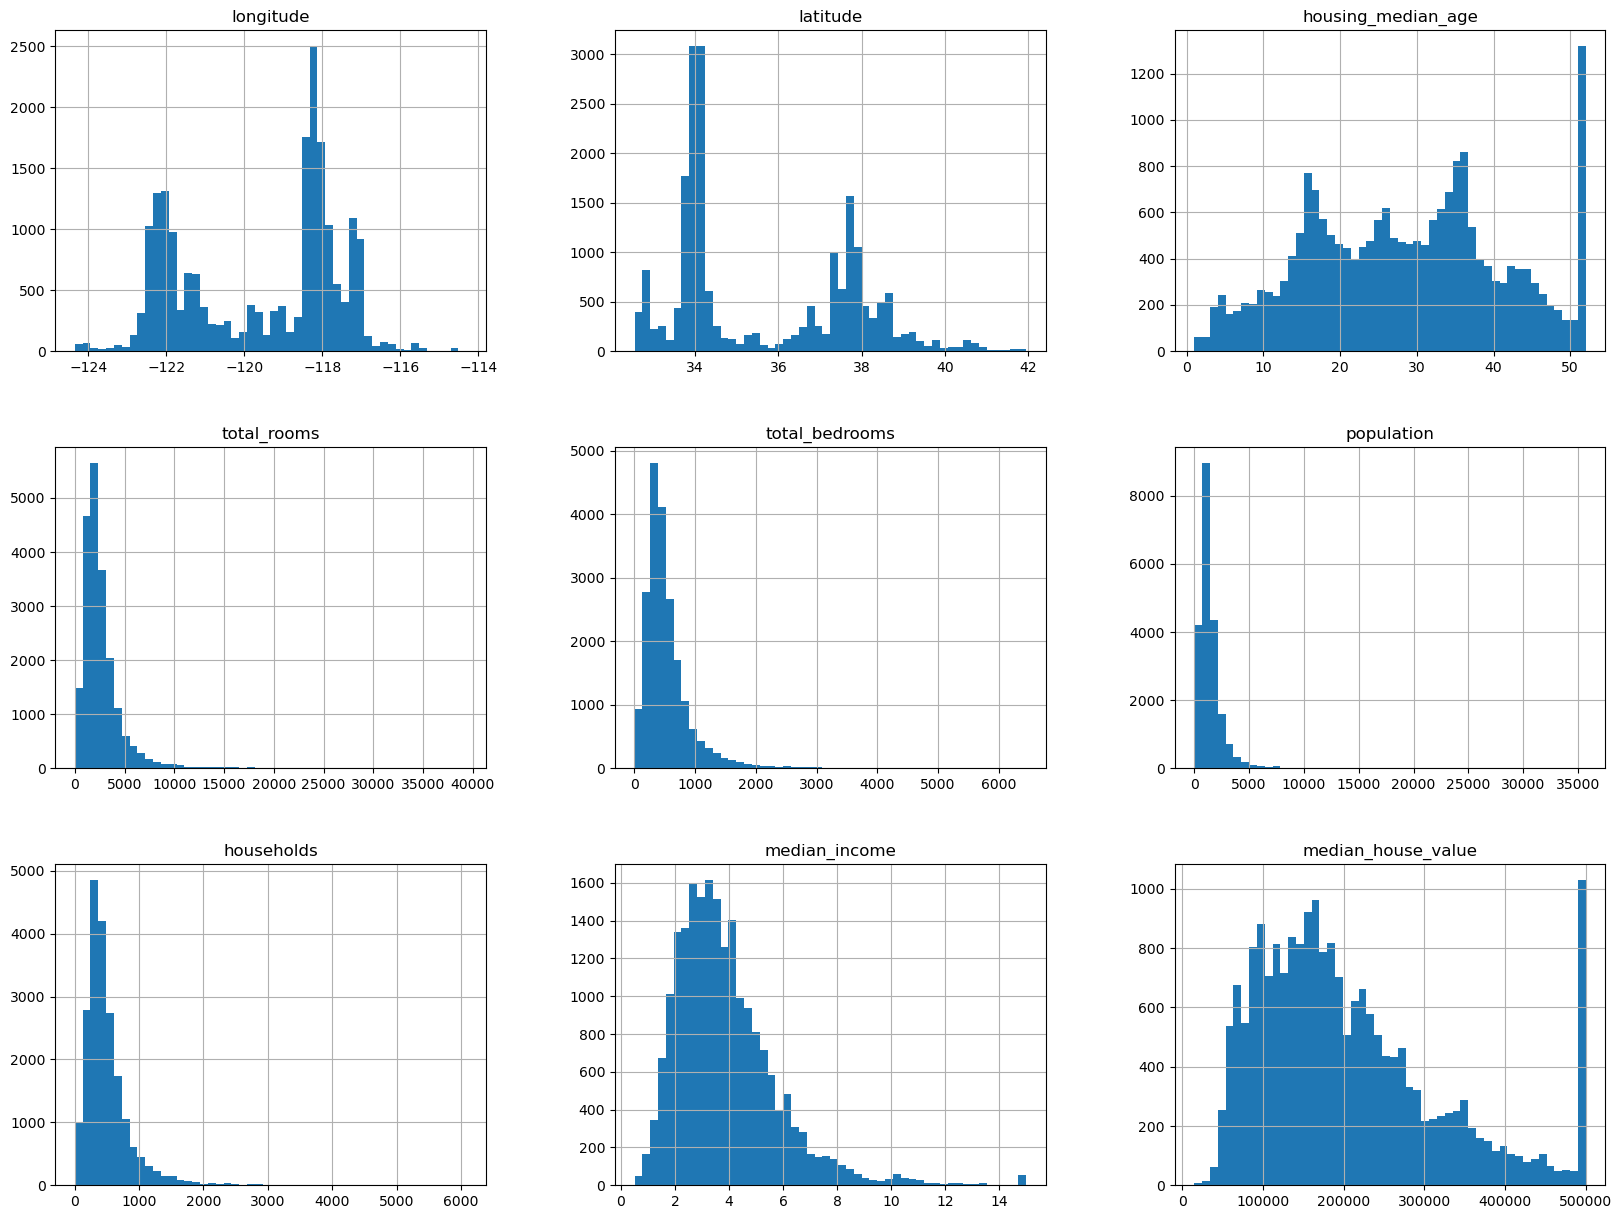

In [10]:
housing_data.hist(bins=50, figsize=(20,15))
plt.show()

# 3. Create test set

- `median_income` is an very significant attribute to predict `median_housing_price`. Therefore the test sets should be able to represent various categories of incomes in the whole dataset

<Axes: >

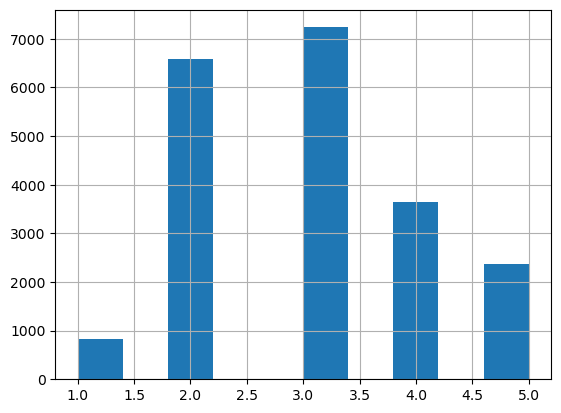

In [15]:
housing_data['income_cat'] = pd.cut(
    housing_data['median_income'],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1,2,3,4,5]
)
housing_data['income_cat'].hist()

- Based on the `income_cat` do the stratified sampling

<Axes: >

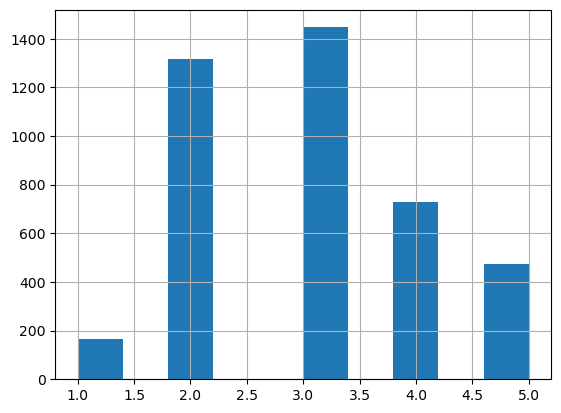

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(
    n_splits = 1,
    test_size=0.2,
    random_state=21)
for train_i, test_i in split.split(housing_data, housing_data['income_cat']):
    train_set = housing_data.loc[train_i]
    test_set = housing_data.loc[test_i]
test_set['income_cat'].hist()

In [17]:
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 3. Explore the data to gain insights
## 3.1 Visualizing Geographical Data
- Create a copy to prevent damaging training set

In [18]:
exploring_data = train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

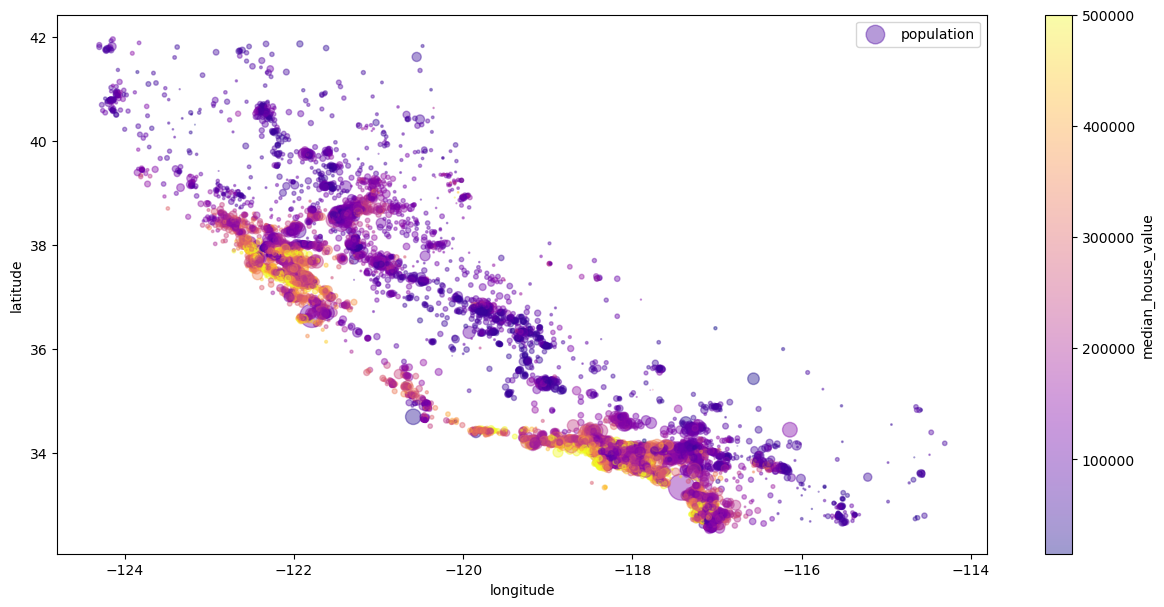

In [26]:
exploring_data.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    figsize=(15,7),
    alpha=0.4,
    s=exploring_data['population']/100, label='population',
    c='median_house_value', cmap=plt.get_cmap('plasma'), colorbar=True
    
)